**go to this link for more details** : https://github.com/codebasics/py/blob/master/ML/5_one_hot_encoding/one_hot_encoding.ipynb

In [36]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('homeprices6.csv')

In [4]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [11]:
dummies=pd.get_dummies(df.town)

In [12]:
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [15]:
model = pd.concat([df,dummies],axis='columns')

In [16]:
model

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [19]:
final_model=model.drop(['town','monroe township'],axis='columns')
final_model

,area,price,robinsville,west windsor
0,2600,550000,False,False
1,3000,565000,False,False
2,3200,610000,False,False
3,3600,680000,False,False
4,4000,725000,False,False
5,2600,585000,False,True
6,2800,615000,False,True
7,3300,650000,False,True
8,3600,710000,False,True
9,2600,575000,True,False


In [22]:
X=final_model.drop(['price'],axis='columns')
X

,area,robinsville,west windsor
0,2600,False,False
1,3000,False,False
2,3200,False,False
3,3600,False,False
4,4000,False,False
5,2600,False,True
6,2800,False,True
7,3300,False,True
8,3600,False,True
9,2600,True,False


In [23]:
Y=final_model.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [24]:
reg=linear_model.LinearRegression()
reg.fit(X,Y)


LinearRegression()

In [32]:
reg.predict([[2800,1,0]])

c:\phython 3.7\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [29]:
print(reg.score(X,Y))

0.9573929037221872


In [34]:
y=reg.predict(X)
y

array([539709.7398409 , 590468.71640507, 615848.20468716, 666607.18125134,
       717366.15781552, 579723.71533004, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.1513653 , 603465.38378843, 628844.87207052,
       692293.59277575])

Text(0, 0.5, 'Price')

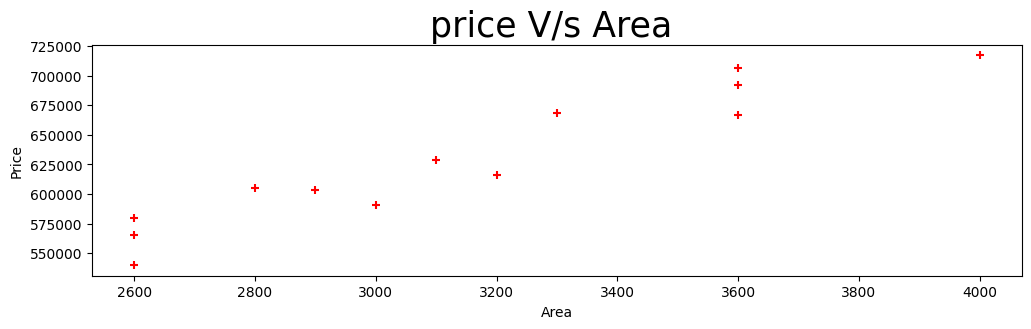

In [44]:
plt.figure(figsize=[12,3])
plt.scatter(X.area,y,marker='+',color='red')
plt.title("price V/s Area ",fontsize=25)
plt.xlabel("Area")
plt.ylabel("Price")

## Using Sklearn OneHotEncoder

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
dfle = df
dfle

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [53]:
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [57]:
X=df[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [59]:
Y=df.price.values
Y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

**'town': This is a string identifier for the transformation. It is just a label and can be any string.
OneHotEncoder(): This is an instance of the OneHotEncoder class, which is used for one-hot encoding categorical features.
[0]: This specifies the index of the column to be transformed. In this case, column at index 0 will be one-hot encoded.
The remainder='passthrough' parameter indicates that the remaining columns in the dataset that are not explicitly transformed should be passed through without any changes.**

In [103]:
ct=ColumnTransformer([('town',OneHotEncoder(),[0])],remainder='passthrough')

In [80]:
X=ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [81]:
X=X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [82]:
reg.fit(X,Y)
reg.score(X,Y)

0.9573929037221873

In [83]:
reg.predict([[1,0,2800]])

array([590775.63964739])

In [84]:
reg.predict([[0,1,2800]])

array([605103.20361213])

In [85]:
reg.predict([[0,0,2800]])

array([565089.22812299])

## Excersice

In [132]:
car_df = pd.read_csv('carprices.csv')
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [133]:
car_df.tail()

,Car Model,Mileage,Sell Price($),Age(yrs)
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6
10,Mercedez Benz C class,83000,20000,7
11,Mercedez Benz C class,79000,21000,7
12,Mercedez Benz C class,59000,33000,5


1. -> Audi A5
2. -> BMW
3. -> Mercedez Benz C class 
4. ->

In [134]:

car_df['Car Model']=le.fit_transform(car_df['Car Model'])
car_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [135]:
X=car_df.drop('Sell Price($)',axis='columns')
X=X.values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [136]:
Y=car_df['Sell Price($)'].values
Y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [137]:
ct2=ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder='passthrough')

In [138]:
X = ct2.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [139]:
X=X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [140]:
reg.fit(X,Y)
reg.score(X,Y)

0.9417050937281082

In [143]:
reg.predict([[0,1,45000,4]])

array([36991.31721062])

In [147]:
reg.predict([[1,0,86000,7]])

array([11080.74313219])